In [78]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")


import pandas as pd
ds_gk = pd.read_csv('datasets/gk.df.csv')
ds_upah = pd.read_csv('datasets/upah.df.csv')
ds_pengeluaran = pd.read_csv('datasets/peng.df.csv')
ds_ump = pd.read_csv('datasets/ump.df.csv')


In [98]:
ds_gk.describe()
ds_upah.describe()
ds_pengeluaran.describe()
ds_ump.describe()

,tahun,ump
count,735.000000,7.110000e+02
mean,2012.000000,1.402290e+06
std,6.059424,8.762622e+05
min,2002.000000,2.450000e+05
25%,2007.000000,6.639865e+05
50%,2012.000000,1.125207e+06
75%,2017.000000,2.074002e+06
max,2022.000000,4.641854e+06


In [80]:
print(ds_pengeluaran['jenis'].unique())


['MAKANAN' 'NONMAKANAN' 'TOTAL']


In [81]:
gkJenis = ds_gk.query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['gk'].mean().round(decimals=0).reset_index()
print(gkJenis)

     tahun           provinsi        gk
0     2013               ACEH  347714.0
1     2013               BALI  274265.0
2     2013             BANTEN  270225.0
3     2013           BENGKULU  320500.0
4     2013      DI YOGYAKARTA  286915.0
..     ...                ...       ...
345   2022  SULAWESI TENGGARA  420774.0
346   2022     SULAWESI UTARA  440359.0
347   2022     SUMATERA BARAT  632289.0
348   2022   SUMATERA SELATAN  503999.0
349   2022     SUMATERA UTARA  574907.0

[350 rows x 3 columns]


In [82]:
pengeluaranJenis = ds_pengeluaran.query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['peng'].mean().round(decimals=0).reset_index()
print(pengeluaranJenis)

     tahun           provinsi       peng
0     2007               ACEH   366737.0
1     2007               BALI   426027.0
2     2007             BANTEN   400548.0
3     2007           BENGKULU   339987.0
4     2007      DI YOGYAKARTA   362410.0
..     ...                ...        ...
555   2022  SULAWESI TENGGARA  1153846.0
556   2022     SULAWESI UTARA  1229053.0
557   2022     SUMATERA BARAT  1345257.0
558   2022   SUMATERA SELATAN  1176720.0
559   2022     SUMATERA UTARA  1203490.0

[560 rows x 3 columns]


In [83]:
gkTahunan = gkJenis.query("tahun >= 2016").groupby(['tahun', 'provinsi'])['gk'].mean().round(decimals=0)
umpTahunan = ds_ump.query("tahun >= 2016").groupby(['tahun', 'provinsi'])['ump'].mean().round(decimals=0)
pengeluaranTahunan = pengeluaranJenis.query("tahun >= 2016").groupby(['tahun', 'provinsi'])['peng'].mean().round(decimals=0)
upahTahunan = ds_upah.query("tahun >= 2016").groupby(['tahun', 'provinsi'])['upah'].mean().round(decimals=0)

Menggabungkan menjadi 1 Data Frame

In [84]:
resultDiscovered = pd.concat([gkTahunan, umpTahunan, pengeluaranTahunan, upahTahunan], axis=1, join='outer')
result = pd.concat([gkTahunan, umpTahunan, pengeluaranTahunan, upahTahunan], axis=1, join='outer').reset_index()
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(result)

     tahun           provinsi        gk        ump       peng     upah
0     2016               ACEH  421498.0  2118500.0   867173.0  13627.0
1     2016               BALI  340343.0  1807600.0  1069888.0  14852.0
2     2016             BANTEN  366790.0  1784000.0  1060726.0  21033.0
3     2016           BENGKULU  429966.0  1605000.0   948806.0  13471.0
4     2016      DI YOGYAKARTA  353014.0   988500.0  1010194.0  12070.0
..     ...                ...       ...        ...        ...      ...
240   2022  SULAWESI TENGGARA  420774.0  2710596.0  1153846.0  17542.0
241   2022     SULAWESI UTARA  440359.0  3310723.0  1229053.0  18335.0
242   2022     SUMATERA BARAT  632289.0  2512539.0  1345257.0  15887.0
243   2022   SUMATERA SELATAN  503999.0  3144446.0  1176720.0  15978.0
244   2022     SUMATERA UTARA  574907.0  2522610.0  1203490.0  15131.0

[245 rows x 6 columns]


Merubah nama kolom

In [85]:
result.rename(columns={'tahun':'Tahun', 'provinsi':'Provinsi', 'ump':'UpahMinimumPerbulan', 'gk':'GarisKemiskinan', 'peng':'PengeluaranPerBulan', 'upah':'UpahPerJam'}, inplace=1 )
print(result)

     Tahun           Provinsi  GarisKemiskinan  UpahMinimumPerbulan  PengeluaranPerBulan  UpahPerJam
0     2016               ACEH         421498.0            2118500.0             867173.0     13627.0
1     2016               BALI         340343.0            1807600.0            1069888.0     14852.0
2     2016             BANTEN         366790.0            1784000.0            1060726.0     21033.0
3     2016           BENGKULU         429966.0            1605000.0             948806.0     13471.0
4     2016      DI YOGYAKARTA         353014.0             988500.0            1010194.0     12070.0
..     ...                ...              ...                  ...                  ...         ...
240   2022  SULAWESI TENGGARA         420774.0            2710596.0            1153846.0     17542.0
241   2022     SULAWESI UTARA         440359.0            3310723.0            1229053.0     18335.0
242   2022     SUMATERA BARAT         632289.0            2512539.0            1345257.0   

Analysis
Provinsi dengan rata-rata upah bulanan (asumsi jam kerja adalah 173 jam per bulan) lebih rendah dari UMP

In [86]:
result['UpahRataRataPerbulan'] = result['UpahPerJam']*173

result['StatusUMP'] = np.where(result['UpahRataRataPerbulan'] < result['UpahMinimumPerbulan'], 'Dibawah UMP', 'Tidak Dibawah UMP')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

result

,Tahun,Provinsi,GarisKemiskinan,UpahMinimumPerbulan,PengeluaranPerBulan,UpahPerJam,UpahRataRataPerbulan,StatusUMP
0,2016,ACEH,421498.0,2118500.0,867173.0,13627.0,2357471.0,Tidak Dibawah UMP
1,2016,BALI,340343.0,1807600.0,1069888.0,14852.0,2569396.0,Tidak Dibawah UMP
2,2016,BANTEN,366790.0,1784000.0,1060726.0,21033.0,3638709.0,Tidak Dibawah UMP
3,2016,BENGKULU,429966.0,1605000.0,948806.0,13471.0,2330483.0,Tidak Dibawah UMP
4,2016,DI YOGYAKARTA,353014.0,988500.0,1010194.0,12070.0,2088110.0,Tidak Dibawah UMP
...,...,...,...,...,...,...,...,...
240,2022,SULAWESI TENGGARA,420774.0,2710596.0,1153846.0,17542.0,3034766.0,Tidak Dibawah UMP
241,2022,SULAWESI UTARA,440359.0,3310723.0,1229053.0,18335.0,3171955.0,Dibawah UMP
242,2022,SUMATERA BARAT,632289.0,2512539.0,1345257.0,15887.0,2748451.0,Tidak Dibawah UMP
243,2022,SUMATERA SELATAN,503999.0,3144446.0,1176720.0,15978.0,2764194.0,Dibawah UMP


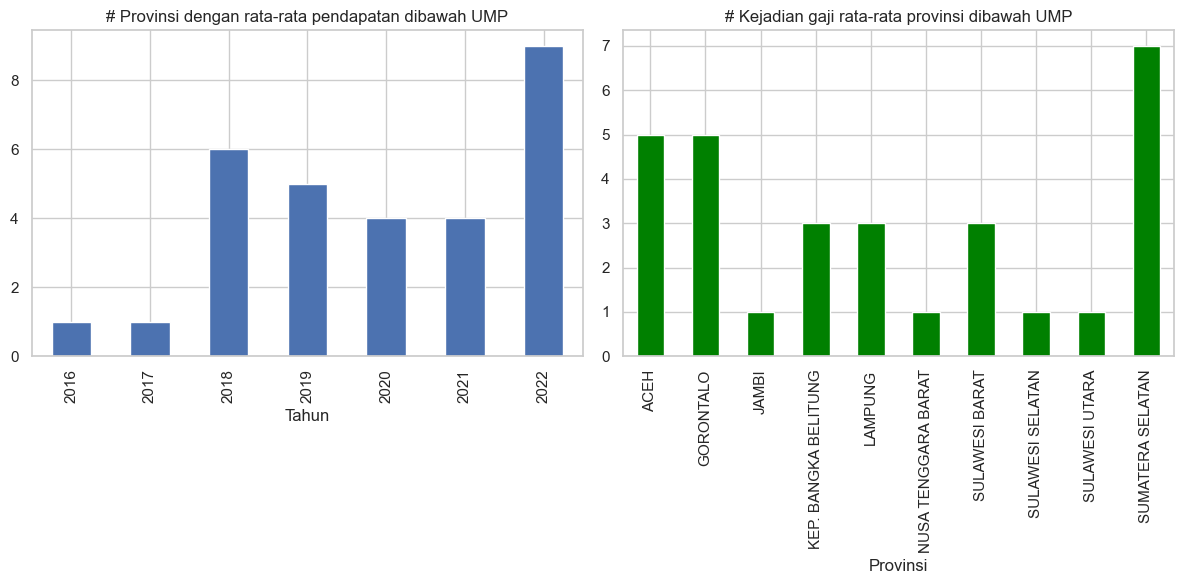

In [87]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

jumlahTahun = result.query("`StatusUMP` == 'Dibawah UMP'")
grupingTahun = jumlahTahun.groupby(['Tahun']).size()

grupingTahun.plot(kind='bar', ax = axes[0], subplots=True)

jumlahProvinsi = result.query("`StatusUMP` == 'Dibawah UMP'")
grupingProvinsi = jumlahTahun.groupby(['Provinsi']).size()
grupingProvinsi.plot(kind='bar', ax=axes[1], subplots=True, color='green')

axes[0].set_title(f"# Provinsi dengan rata-rata pendapatan dibawah UMP")
axes[1].set_title(f"# Kejadian gaji rata-rata provinsi dibawah UMP")

plt.tight_layout()
plt.show()

In [88]:
result.loc[:, ~result.columns.isin(['Provinsi', 'Tahun', 'StatusUMP'])].corr()

,GarisKemiskinan,UpahMinimumPerbulan,PengeluaranPerBulan,UpahPerJam,UpahRataRataPerbulan
GarisKemiskinan,1.000000,0.584619,0.773740,0.609135,0.609135
UpahMinimumPerbulan,0.584619,1.000000,0.644684,0.653905,0.653905
PengeluaranPerBulan,0.773740,0.644684,1.000000,0.747722,0.747722
UpahPerJam,0.609135,0.653905,0.747722,1.000000,1.000000
UpahRataRataPerbulan,0.609135,0.653905,0.747722,1.000000,1.000000


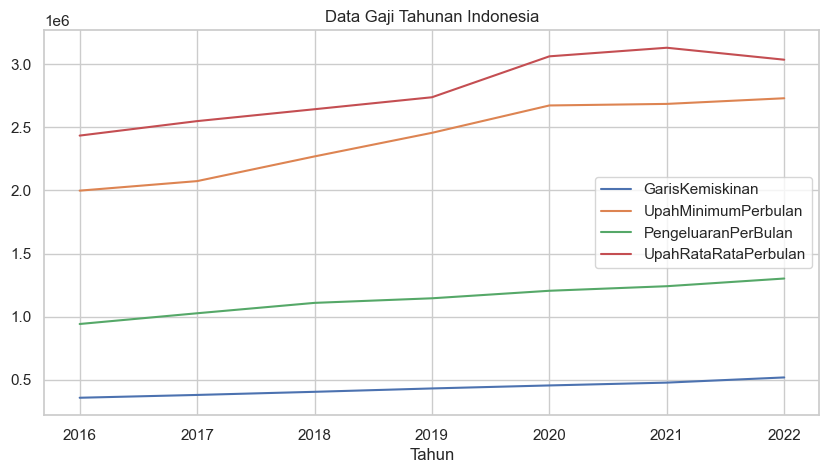

In [89]:
hasilNasional = result[result['Provinsi'] == 'INDONESIA']
hasilNasional

import matplotlib.pyplot as plt
hasilNasional.plot(x='Tahun', y=['GarisKemiskinan', 'UpahMinimumPerbulan', 'PengeluaranPerBulan', 'UpahRataRataPerbulan'], figsize=(10,5))

plt.xlabel=('Tahun')
plt.ylabel=('Value')
plt.title('Data Gaji Tahunan Indonesia')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


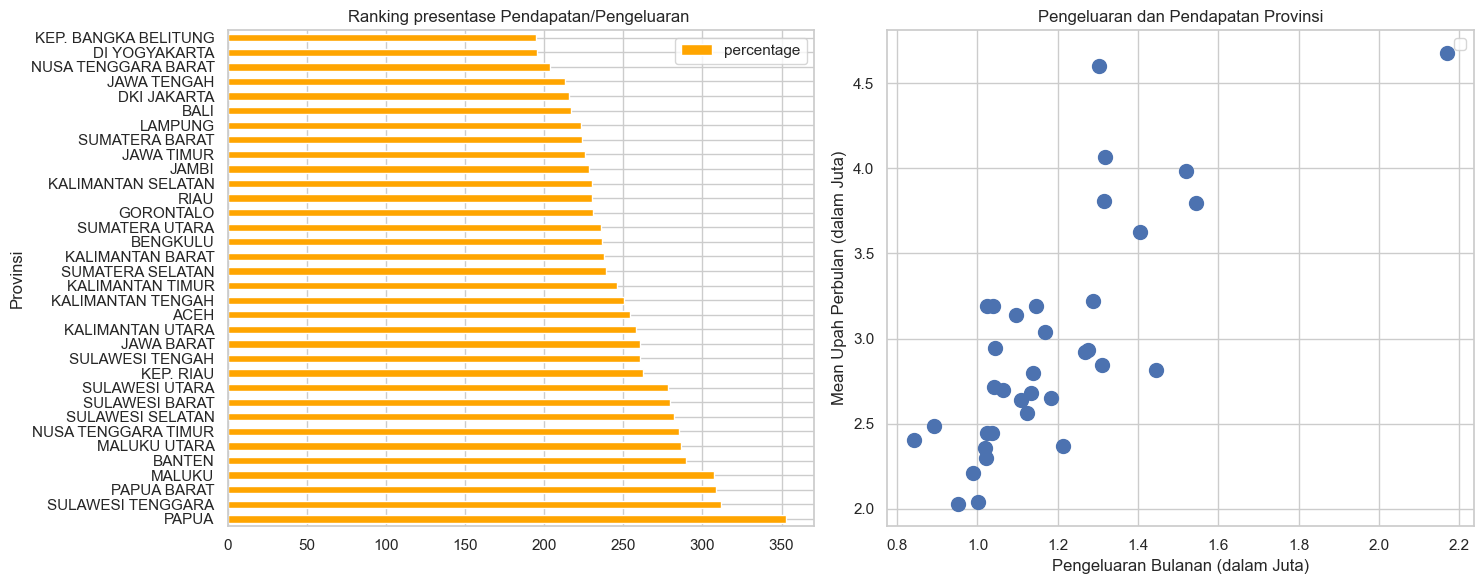

In [101]:
RataRataGajiProvinsi = result.groupby(['Provinsi'])['UpahRataRataPerbulan'].mean().round(0)
RataRataPengeluaranProvinsi = result.groupby(['Provinsi'])['PengeluaranPerBulan'].mean().round(0)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

RataRataProvinsi = pd.concat([RataRataGajiProvinsi, RataRataPengeluaranProvinsi], axis=1, join='outer').reset_index()
RataRataProvinsi['Mean Upah Perbulan (dalam Juta)'] = RataRataProvinsi['UpahRataRataPerbulan']/1000000
RataRataProvinsi['Pengeluaran Bulanan (dalam Juta)'] = RataRataProvinsi['PengeluaranPerBulan']/1000000
# RataRataProvinsi
ax = RataRataProvinsi.plot(kind='scatter', x = 'Pengeluaran Bulanan (dalam Juta)', y = 'Mean Upah Perbulan (dalam Juta)', s = 100, ax = axes[1], subplots=True)



RataRataProvinsi['percentage'] = 100*RataRataProvinsi['UpahRataRataPerbulan']/RataRataProvinsi['PengeluaranPerBulan']
PersentaseRataRataProvinsi = RataRataProvinsi.query("`Provinsi` != 'INDONESIA'")
PersentaseRataRataProvinsi = PersentaseRataRataProvinsi.sort_values(by=['percentage'], ascending=False)
# PersentaseRataRataProvinsi
PersentaseRataRataProvinsi.plot(kind="barh", color='orange', x='Provinsi', y='percentage', ax = axes[0], subplots=True)


axes[1].set_title(f"Pengeluaran dan Pendapatan Provinsi")
axes[0].set_title(f"Ranking presentase Pendapatan/Pengeluaran ")

# plt.xticks(np.arange(0, 5,step=0.5))
# plt.yticks(np.arange(0, 5,step=0.5))
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

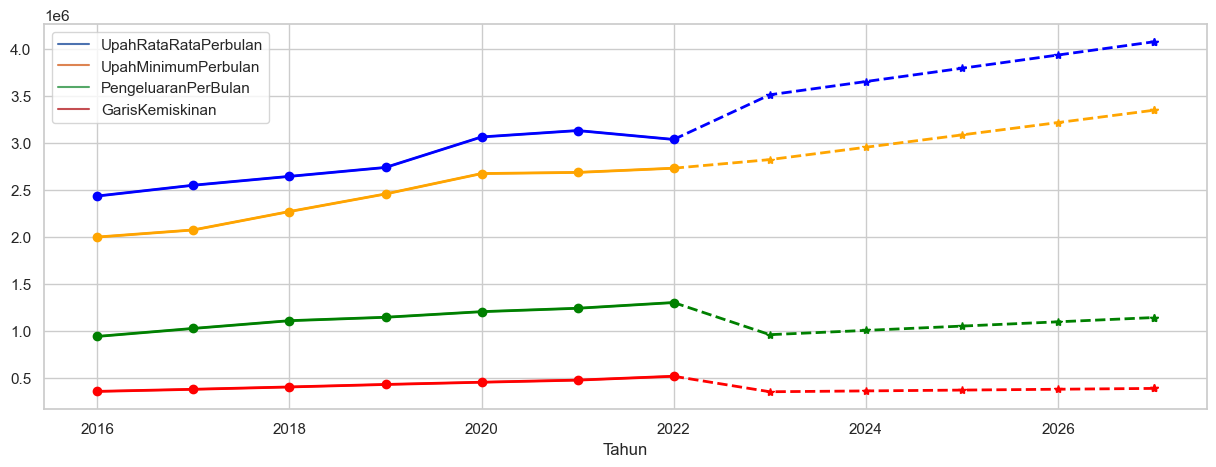

In [102]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

HasilNasional = result[result['Provinsi'] == 'INDONESIA']
# print(HasilNasional)

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Process Data GK
gkClear = ds_gk.groupby(['tahun'])['gk'].mean().round(0).reset_index()
gkClear.rename(columns = {'tahun':'Tahun', 'gk':'GarisKemiskinan'}, inplace = True)
modelPoverty = model1.fit( gkClear[["Tahun"]], gkClear["GarisKemiskinan"] )

# Process Data UMP
umpClear = ds_ump.groupby(['tahun'])['ump'].mean().round(0).reset_index()
umpClear.rename(columns = {'tahun':'Tahun', 'ump':'UpahMinimumPerbulan'}, inplace = True)
modelUmp = model2.fit( umpClear[["Tahun"]], umpClear["UpahMinimumPerbulan"] )

# Process Data Expense
pengeluaranClear = ds_pengeluaran.groupby(['tahun'])['peng'].mean().round(0).reset_index()
pengeluaranClear.rename(columns = {'tahun':'Tahun', 'peng':'PengeluaranPerBulan'}, inplace = True)
modelExpense = model3.fit( pengeluaranClear[["Tahun"]], pengeluaranClear["PengeluaranPerBulan"] )

# Process Data Expense
upahClear = ds_upah.groupby(['tahun'])['upah'].mean().round(0).reset_index()
upahClear.rename(columns = {'tahun':'Tahun'}, inplace = True)
upahClear['UpahRataRataPerbulan'] = upahClear['upah']*173
modelSalary = model4.fit( upahClear[["Tahun"]], upahClear["UpahRataRataPerbulan"] )


data = []
data.append( {"Tahun": 2023} )
data.append( {"Tahun": 2024} )
data.append( {"Tahun": 2025} )
data.append( {"Tahun": 2026} )
data.append( {"Tahun": 2027} )
data.append( {"Tahun": 2027} )
df2 = pd.DataFrame(data)

# Add a new column to df2 with the predicted prices:
res = pd.DataFrame(data)
res["UpahMinimumPerbulan"] = modelUmp.predict(df2)
res["GarisKemiskinan"] = modelPoverty.predict(df2)
res["PengeluaranPerBulan"] = modelExpense.predict(df2)
res["UpahRataRataPerbulan"] = modelSalary.predict(df2)


HasilNasional = HasilNasional.drop(columns=['Provinsi', 'StatusUMP', 'UpahPerJam'])
finalResult = pd.concat([HasilNasional, res], axis=0, join='outer').reset_index()
prediction = finalResult.query("Tahun >= 2022")
# print(prediction)

HasilNasional.plot(x='Tahun', y=['UpahRataRataPerbulan','UpahMinimumPerbulan', 'PengeluaranPerBulan','GarisKemiskinan'], figsize=(15,5))

# Plot Existing Data
plt.plot('Tahun', 'GarisKemiskinan', data=HasilNasional, marker='o', color='red', linewidth=2)
plt.plot('Tahun', 'UpahMinimumPerbulan', data=HasilNasional, marker='o', color='orange', linewidth=2)
plt.plot('Tahun','PengeluaranPerBulan',data=HasilNasional ,marker='o',color='green', linewidth=2)
plt.plot('Tahun','UpahRataRataPerbulan',data=HasilNasional ,marker='o',color='blue', linewidth=2)

# Plot Prediction Data
plt.plot('Tahun', 'GarisKemiskinan', data=prediction, marker='*', color='red', linewidth=2, linestyle = '--')
plt.plot('Tahun', 'UpahMinimumPerbulan', data=prediction, marker='*', color='orange', linewidth=2, linestyle = '--')
plt.plot('Tahun','PengeluaranPerBulan',data=prediction ,marker='*',color='green', linewidth=2, linestyle = '--')
plt.plot('Tahun','UpahRataRataPerbulan',data=prediction ,marker='*',color='blue', linewidth=2, linestyle = '--')

# Set the label
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel('Tahun')
plt.ylabel('Nilai')

# Set the title of the plot
plt.title('Data Ekonomi Tahunan Indonesia')
plt.legend(['GarisKemiskinan', 'UpahMinimumPerbulan', 'PengeluaranPerBulan', 'UpahRataRataPerbulan'], loc='best')

# # Display the plot
plt.show()